### Datset Loading

In [2]:
# Importing datset using pandas
import pandas as pd
df =pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Task 1 : Restaurant Ratings

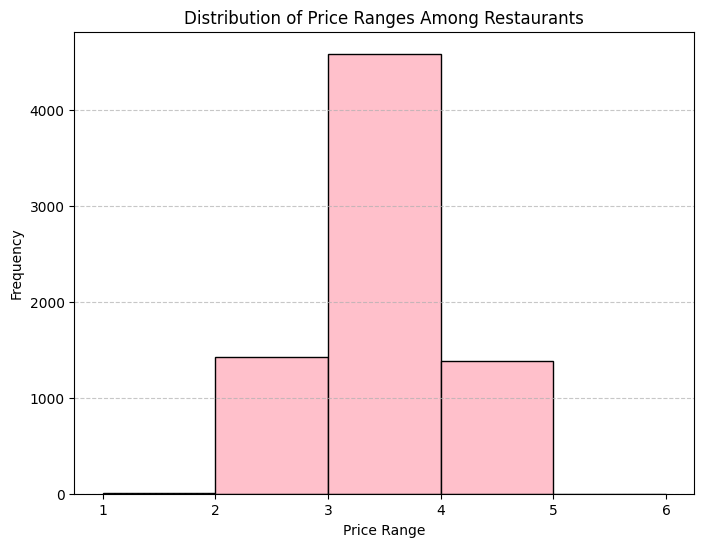

In [3]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=range(1, 7), color='pink', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(range(1, 7)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the restaurants have an aggregate rating between 3 and 4.

In [4]:
votes_sum = (df['Votes'].values).sum()
avg_votes = votes_sum / len(df)
print("The average votes received by the restaurants is: " + str(avg_votes))

The average votes received by the restaurants is: 156.909747670401


### Task 2 : Cuisine Combination

In [12]:
df['Cuisine_list'] = df['Cuisines'].str.split(', ')

combination_counts = {}

for cuisines in df['Cuisine_list']:
    if isinstance(cuisines, list):
        # Join the sorted cuisine list into a string to represent the combination
        combination = ', '.join(sorted(cuisines))
        # Add the combination to the dictionary and update its count
        combination_counts[combination] = combination_counts.get(combination, 0) + 1

print("Unique cuisine combinations and their counts:")
for combination, count in combination_counts.items():
    if len(combination.split(', ')) > 1 and count > 100:
        print(combination, "-", count)


Unique cuisine combinations and their counts:
Fast Food, Pizza - 142
Mughlai, North Indian - 394
Chinese, Mughlai, North Indian - 306
Chinese, Continental, North Indian - 107
Fast Food, North Indian - 120
Desserts, Ice Cream - 109
Chinese, North Indian - 616
Chinese, North Indian, South Indian - 135
Chinese, Fast Food, North Indian - 102
Bakery, Desserts - 181
Chinese, Fast Food - 159
Bakery, Fast Food - 117
Mithai, Street Food - 134


* From the above table we can understand that the most common combination of cuisines with repeatitions > 100.
* The most common combination being Mughlai, North Indian - 394.

### Task 3 : Geographic Analysis

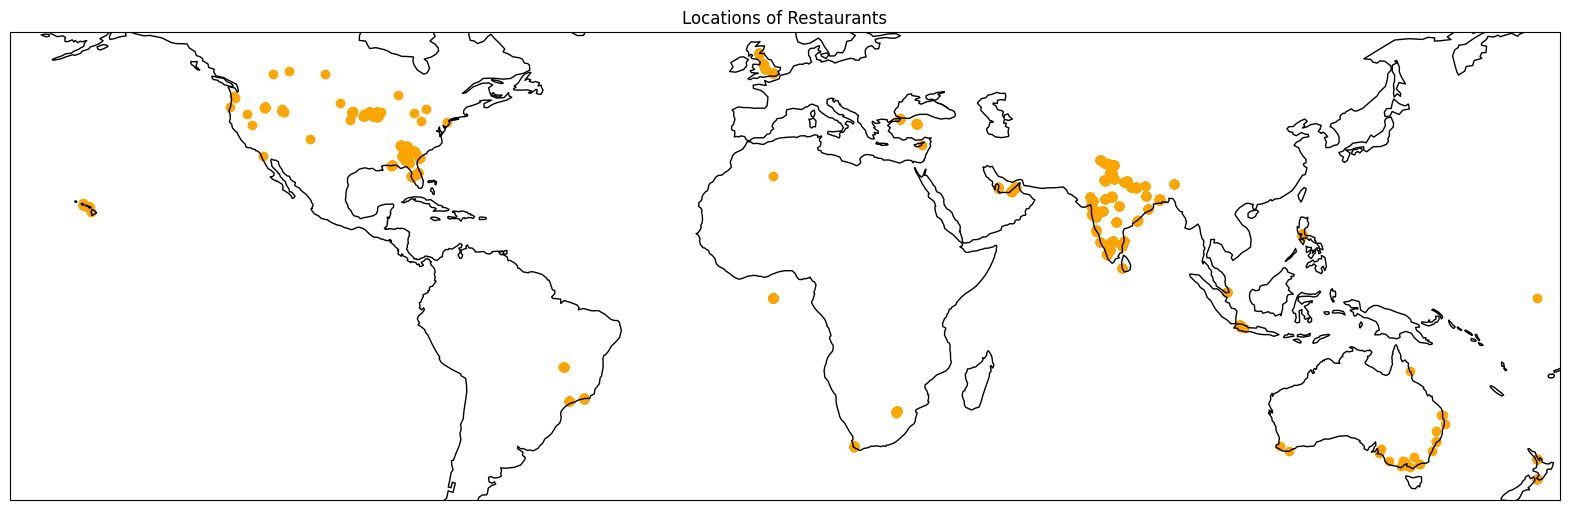

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the locations of restaurants on the world map
ax.scatter(df['Longitude'], df['Latitude'], color='orange', marker='o', transform=ccrs.PlateCarree())

plt.title('Locations of Restaurants')
plt.show()

* The west coast (New South Wales and Victoria) of Australia has a cluster of restaurants.
* The east coast and south region of India also has a cluster of restaurants.
* Bahamas region in USA also has a cluster of restaurants.

### Task 4 : Restaurant Chains

In [ ]:
count = df['Restaurant Name'].value_counts()
chains = count[count>1]
chain_df = pd.DataFrame(chains)
chain_df

,count
Restaurant Name,
Cafe Coffee Day,83
Domino's Pizza,79
Subway,63
Green Chick Chop,51
McDonald's,48
...,...
Town Hall,2
Halki Aanch,2
Snack Junction,2


So we can coclude that there are restaurant chains present in the dataset.

In [ ]:
ccd_ratings = df[df['Restaurant Name'] == 'Cafe Coffee Day']['Aggregate rating']
mean_rating_ccd = ccd_ratings.mean()

dom_rating = df[df['Restaurant Name'] == "Domino's Pizza"]['Aggregate rating']
mean_dom_rating = dom_rating.mean()

subway_rating = df[df['Restaurant Name'] == 'Subway']['Aggregate rating']
mean_sub_rating = subway_rating.mean()

print("Average rating of Cafe Coffee Day is: " + str(mean_rating_ccd))
print("Average rating of Domino's Pizza is: " + str(mean_dom_rating))
print("Average rating of Subway is: " + str(mean_sub_rating))

Average rating of Cafe Coffee Day is: 2.4192771084337346
Average rating of Domino's Pizza is: 2.740506329113924
Average rating of Subway is: 2.9079365079365083


In [ ]:
ccd_ratings = df[df['Restaurant Name'] == 'Cafe Coffee Day']['Votes']
mean_rating_ccd = ccd_ratings.mean()

dom_rating = df[df['Restaurant Name'] == "Domino's Pizza"]['Votes']
mean_dom_rating = dom_rating.mean()

subway_rating = df[df['Restaurant Name'] == 'Subway']['Votes']
mean_sub_rating = subway_rating.mean()

print("Average rating of Cafe Coffee Day is: " + str(mean_rating_ccd))
print("Average rating of Domino's Pizza is: " + str(mean_dom_rating))
print("Average rating of Subway is: " + str(mean_sub_rating))

Average rating of Cafe Coffee Day is: 29.253012048192772
Average rating of Domino's Pizza is: 84.0886075949367
Average rating of Subway is: 97.2063492063492


From the above two analysis, we can understand that Subway has more ratings and popularity.